In [60]:
#-*- coding: utf-8 -*-
import pandas as pd

In [61]:
'''
____________________________________________________________________________________
这里路径改一下就行，不需要就注释掉
————————————————————————————————————————————————————————————————————————————————————
'''
datafile= r'C:\Users\DELL\Desktop\air_data.csv'  # 航空原始数据,第一行为属性标签
# 读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）
data = pd.read_csv(datafile, encoding = 'utf-8')
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


## 空值最大值最小值

In [62]:
explore = data.describe().T 
explore['null'] = len(data)-explore['count']

explore = explore[['null', 'max', 'min']]
explore.columns = [u'空值数', u'最大值', u'最小值']  # 表头重命名

print(explore.head())

                空值数       最大值  最小值
MEMBER_NO       0.0   62988.0  1.0
FFP_TIER        0.0       6.0  4.0
AGE           420.0     110.0  6.0
FLIGHT_COUNT    0.0     213.0  2.0
BP_SUM          0.0  505308.0  0.0


# 分布分析

## 客户基本信息分析

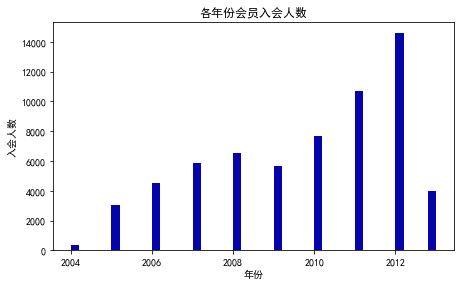

In [69]:
import os
import matplotlib.pyplot as plt
from datetime import datetime
ffp = data['FFP_DATE'].apply(lambda x:datetime.strptime(x,'%Y/%m/%d'))
ffp_year = ffp.map(lambda x : x.year)
# 绘制各年份会员入会人数直方图
fig = plt.figure(figsize=(8 ,5))  # 设置画布大小
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False # 设置正常显示字符
plt.hist(ffp_year, bins='auto', color='#0504aa')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')
'''
____________________________________________________________________________________
加了保存图片代码，这里路径改一下就行，不需要就注释掉
————————————————————————————————————————————————————————————————————————————————————
'''
fig = plt.gcf()
fig.set_size_inches(7.2, 4.2)
fig.savefig(r'C:\Users\DELL\Desktop\1Year_membership.png', dpi=100)
plt.show()

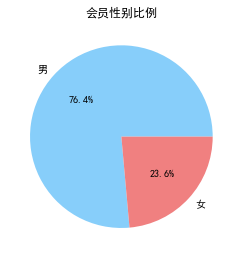

In [64]:
# 提取会员不同性别人数
male = pd.value_counts(data['GENDER'])['男']
female = pd.value_counts(data['GENDER'])['女']
# 绘制会员性别比例饼图
fig = plt.figure(figsize=(7 ,4))  # 设置画布大小
plt.pie([ male, female], labels=['男','女'], colors=['lightskyblue', 'lightcoral'],
       autopct='%1.1f%%')
plt.title('会员性别比例')
'''
____________________________________________________________________________________
加了保存图片代码，这里路径改一下就行，不需要就注释掉
————————————————————————————————————————————————————————————————————————————————————
'''
fig = plt.gcf()
fig.set_size_inches(7.2, 4.2)
fig.savefig(r'C:\Users\DELL\Desktop\2sex_ratio.png', dpi=100)
plt.show()

## 提取会员不同性别人数

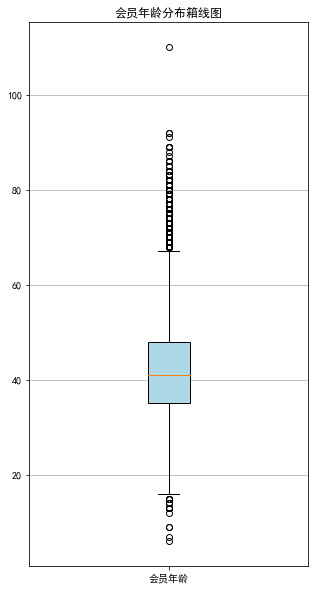

In [65]:
# 提取会员年龄
age = data['AGE'].dropna()
age = age.astype('int64')
# 绘制会员年龄分布箱型图
fig = plt.figure(figsize=(5 ,10))
plt.boxplot(age, 
            patch_artist=True,
            labels = ['会员年龄'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员年龄分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
'''
____________________________________________________________________________________
加了保存图片代码，这里路径改一下就行，不需要就注释掉
————————————————————————————————————————————————————————————————————————————————————
'''
fig = plt.gcf()
fig.savefig(r'C:\Users\DELL\Desktop\3age_distribution.png', dpi=100)
plt.show()

## 会员年龄分布箱型图

## 客户乘机信息分布分析

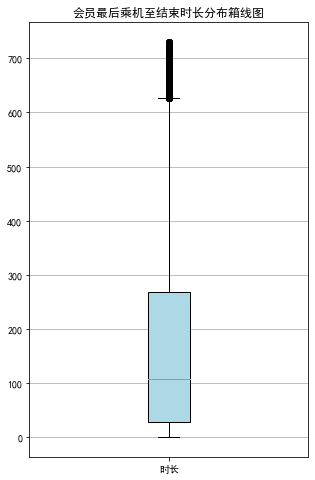

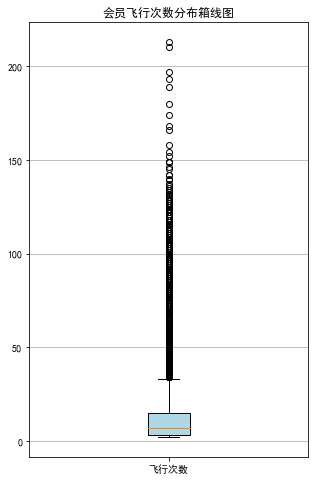

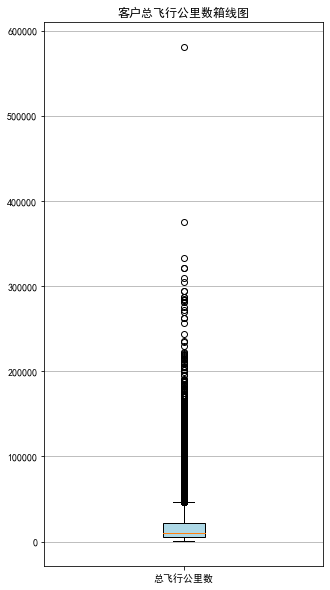

<function matplotlib.pyplot.close(fig=None)>

In [66]:
lte = data['LAST_TO_END']
fc = data['FLIGHT_COUNT']
sks = data['SEG_KM_SUM']

# 绘制最后乘机至结束时长箱线图
fig = plt.figure(figsize=(5 ,8))
plt.boxplot(lte, 
            patch_artist=True,
            labels = ['时长'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员最后乘机至结束时长分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close

# 绘制客户飞行次数箱线图
fig = plt.figure(figsize=(5 ,8))
plt.boxplot(fc, 
            patch_artist=True,
            labels = ['飞行次数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员飞行次数分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close

# 绘制客户总飞行公里数箱线图
fig = plt.figure(figsize=(5 ,10))
plt.boxplot(sks, 
            patch_artist=True,
            labels = ['总飞行公里数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总飞行公里数箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close

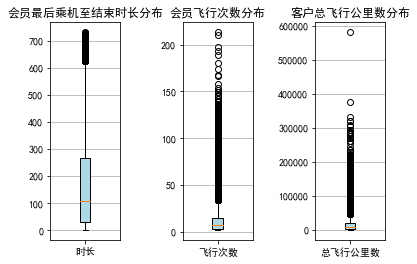

In [67]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.9, wspace=0.9)

plt.subplot(1, 3, 1)
plt.boxplot(lte, 
            patch_artist=True,
            labels = ['时长'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员最后乘机至结束时长分布')
plt.grid(axis='y')
plt.subplot(1, 3, 2)
plt.boxplot(fc, 
            patch_artist=True,
            labels = ['飞行次数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员飞行次数分布')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.subplot(1, 3, 3)
plt.boxplot(sks, 
            patch_artist=True,
            labels = ['总飞行公里数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总飞行公里数分布')
# 显示y坐标轴的底线
plt.grid(axis='y')
'''
____________________________________________________________________________________
加了保存图片代码，这里路径改一下就行，不需要就注释掉
————————————————————————————————————————————————————————————————————————————————————
'''
fig = plt.gcf()
fig.savefig(r'C:\Users\DELL\Desktop\4Flight_information.png', dpi=100)
plt.show()

## 客户积分信息分布分析

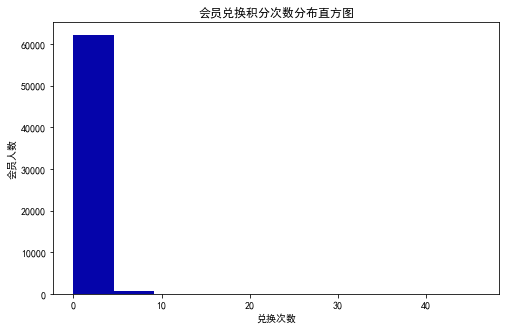

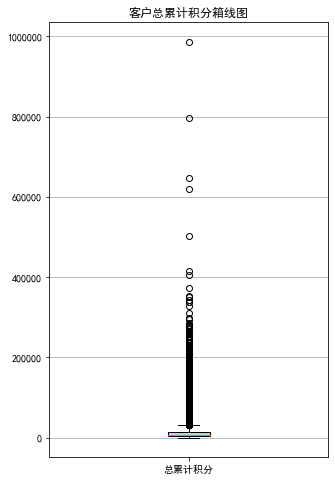

<function matplotlib.pyplot.close(fig=None)>

In [68]:
# 积分信息类别
# 提取会员积分兑换次数
ec = data['EXCHANGE_COUNT']
# 绘制会员兑换积分次数直方图
fig = plt.figure(figsize=(8 ,5))  # 设置画布大小
plt.hist(ec, bins=10, color='#0504aa')
plt.xlabel('兑换次数')
plt.ylabel('会员人数')
plt.title('会员兑换积分次数分布直方图')
'''
____________________________________________________________________________________
加了保存图片代码，这里路径改一下就行，不需要就注释掉
————————————————————————————————————————————————————————————————————————————————————
'''
fig = plt.gcf()
fig.savefig(r'C:\Users\DELL\Desktop\5Points_redemption_times.png', dpi=100)
plt.show()
plt.close

# 提取会员总累计积分
ps = data['Points_Sum']
# 绘制会员总累计积分箱线图
fig = plt.figure(figsize=(5 ,8))
plt.boxplot(ps, 
            patch_artist=True,
            labels = ['总累计积分'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总累计积分箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
'''
____________________________________________________________________________________
加了保存图片代码，这里路径改一下就行，不需要就注释掉
————————————————————————————————————————————————————————————————————————————————————
'''
fig = plt.gcf()
fig.savefig(r'C:\Users\DELL\Desktop\6accumulated_points.png', dpi=100)
plt.show()
plt.close

In [77]:
# 提取属性并合并为新数据集
data_corr = data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END',
                  'SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]
age1 = data['AGE'].fillna(0)
data_corr = data_corr.copy()
data_corr['AGE'] = age2.astype('int64')
data_corr['ffp_year'] = ffp_year1
# 计算相关性矩阵
dt_corr = data_corr.corr(method='pearson')
print('相关性矩阵为：\n',dt_corr)

相关性矩阵为：
                 FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610

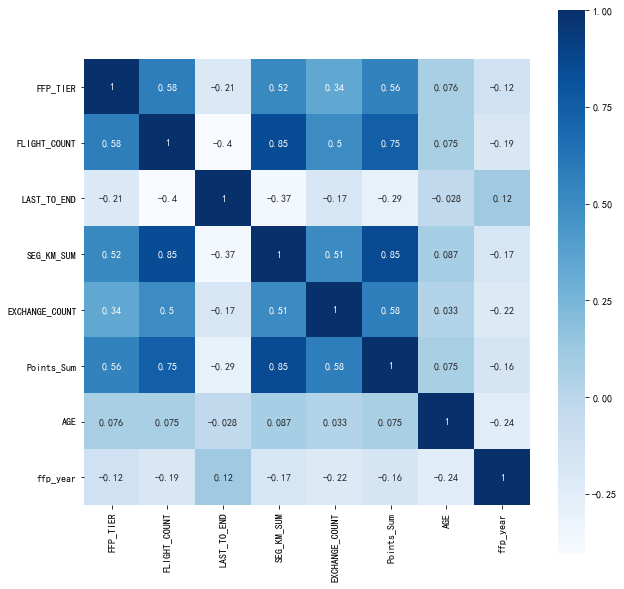

In [79]:
# 绘制热力图
import seaborn as sns
plt.subplots(figsize=(10, 10)) # 设置画面大小 
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues') 
'''
____________________________________________________________________________________
加了保存图片代码，这里路径改一下就行，不需要就注释掉
————————————————————————————————————————————————————————————————————————————————————
'''
fig = plt.gcf()
fig.savefig(r'C:\Users\DELL\Desktop\7Heatmap.png', dpi=100)
plt.show()